In [10]:

import nlpaug.augmenter.sentence as nas
import nlpaug.augmenter.word as naw



# Data Processing


In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
train_data=pd.read_csv("Dataset/Dataset_train.tsv",delimiter='\t', names=['text','labels'])
test_data=pd.read_csv("Dataset/Dataset_test.tsv",delimiter='\t', names=['text','labels'])
val_data=pd.read_csv("Dataset/Dataset_dev.tsv",delimiter='\t', names=['text','labels'])

In [13]:
full_data = pd.concat([train_data,test_data,val_data])


In [14]:
full_data

,text,labels
0,text1,labels
1,creates a backdoor through which remote attack...,"['T1005', 'T1005']"
2,captures window titles.,"['T1010', 'T1010']"
3,hides any strings related to its own indicator...,"['T1027', 'T1027']"
4,creates a backdoor through which remote attack...,"['T1059', 'T1059']"
...,...,...
600,The threat actor can now combine the informati...,"['T1016', 'T1110']"
601,The Trojan then gets the hexadecimal values of...,"['T1573', 'T1070.004', 'T1074', 'T1041', 'T104..."
602,This IP has hosted other domains used by APT3 ...,"['T1016', 'T1068']"
603,We include a list of observed hardcoded ip C2 ...,"['T1016', 'T1008']"


In [19]:
full_data['labels'] = full_data['labels'].apply(lambda x: x.replace(" ", "").strip('[]').split(','))
def strip_quotes(label_list):
    return [label.strip("'") for label in label_list]
full_data.labels=full_data.labels.apply(strip_quotes)

In [21]:
full_data=full_data.drop(index=0)

In [23]:
def unique_labels(labels):
    unique = []
    for y in labels:
        for technique in y:
            if technique.strip() not in unique:
                unique.append(technique.strip())
    return unique

In [25]:
def plot_classes_sums(classes,color='blue'):
    plt.figure(figsize=(40,6))
    plt.subplot(1,2,2)
    bars=classes.plot(kind='bar',color=color)
    plt.xlabel("Technique ID")
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    for p in bars.patches:
        bars.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

In [29]:
UniqueLabels=unique_labels(full_data.labels)
len(UniqueLabels)

193

In [31]:
UniqueLabels

['T1005',
 'T1010',
 'T1027',
 'T1059',
 'T1074',
 'T1105',
 'T1112',
 'T1564.001',
 'T1204.002',
 'T1071.001',
 'T1041',
 'T1071',
 'T1132',
 'T1056.001',
 'T1056',
 'T1203',
 'T1053.005',
 'T1053',
 'T1057',
 'T1026',
 'T1113',
 'T1070.004',
 'T1553.002',
 'T1574.002',
 'T1047',
 'T1090.003',
 'T1055.013',
 'T1574.001',
 'T1114',
 'T1021.002',
 'T1012',
 'T1547.001',
 'T1547.009',
 'T1546.008',
 'T1030',
 'T1003',
 'T1078',
 'T1133',
 'T1049',
 'T1007',
 'T1083',
 'T1087',
 'T1036',
 'T1016',
 'T1046',
 'T1001',
 'T1098',
 'T1543.001',
 'T1037.004',
 'T1543.003',
 'T1124',
 'T1064',
 'T1082',
 'T1033',
 'T1025',
 'T1486',
 'T1218.011',
 'T1055',
 'T1070',
 'T1104',
 'T1102',
 'T1095',
 'T1571',
 'T1518.001',
 'T1120',
 'T1090',
 'T1140',
 'T1037',
 'T1548.002',
 'T1055.012',
 'T1027.002',
 'T1027.001',
 'T1027.005',
 'T1043',
 'T1204',
 'T1598.003',
 'T1021.001',
 'T1068',
 'T1119',
 'T1020',
 'T1197',
 'T1573',
 'T1127',
 'T1008',
 'T1562.001',
 'T1546.007',
 'T1048',
 'T1569.002',


In [33]:
cleaned_list = [item.strip("'") for item in UniqueLabels]

In [35]:
ohe_matrix = np.zeros((len(full_data),len(cleaned_list)))
full_data[cleaned_list]=ohe_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_9300\3021261332.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data[cleaned_list]=ohe_matrix
C:\Users\user\AppData\Local\Temp\ipykernel_9300\3021261332.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data[cleaned_list]=ohe_matrix
C:\Users\user\AppData\Local\Temp\ipykernel_9300\3021261332.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

In [37]:
full_data

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
1,creates a backdoor through which remote attack...,"[T1005, T1005]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,captures window titles.,"[T1010, T1010]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hides any strings related to its own indicator...,"[T1027, T1027]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,creates a backdoor through which remote attack...,"[T1059, T1059]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,stages collected data in a text file.,"[T1074, T1074]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,The threat actor can now combine the informati...,"[T1016, T1110]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,The Trojan then gets the hexadecimal values of...,"[T1573, T1070.004, T1074, T1041, T1048, T1486]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,This IP has hosted other domains used by APT3 ...,"[T1016, T1068]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,We include a list of observed hardcoded ip C2 ...,"[T1016, T1008]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
full_data=full_data.reset_index(drop=True)

In [41]:
def remove_duplicates(data) : 
    filtered_labels=[]
    for y in data.labels:
        filtered_labels.append(list(set(y)))
    data.labels=filtered_labels
remove_duplicates(full_data)

In [43]:
def one_hot_encoder(data):
    for i in  range(0,len(data)) :
        for label in data.loc[i].labels : 
            data.loc[i,label]=1
one_hot_encoder(full_data)

In [45]:
full_data[UniqueLabels]=full_data[UniqueLabels].astype(int)

In [47]:
full_data

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,The threat actor can now combine the informati...,"[T1016, T1110]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4793,The Trojan then gets the hexadecimal values of...,"[T1048, T1070.004, T1074, T1041, T1486, T1573]",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4794,This IP has hosted other domains used by APT3 ...,"[T1016, T1068]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4795,We include a list of observed hardcoded ip C2 ...,"[T1016, T1008]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


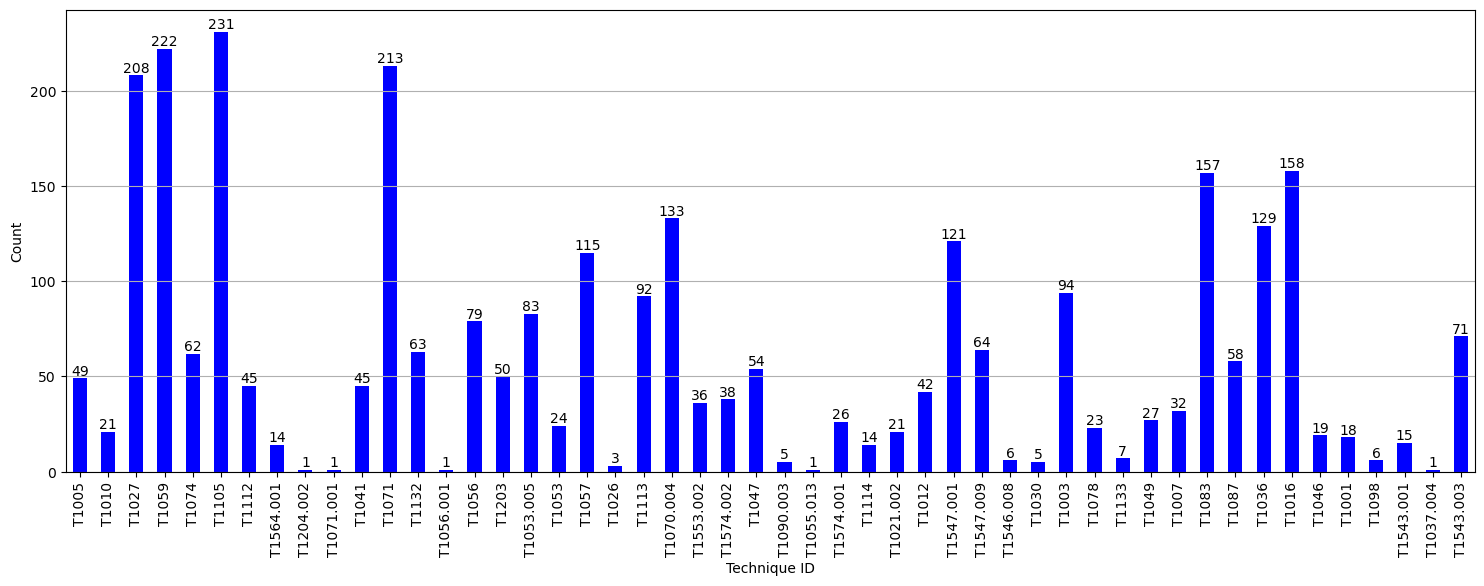

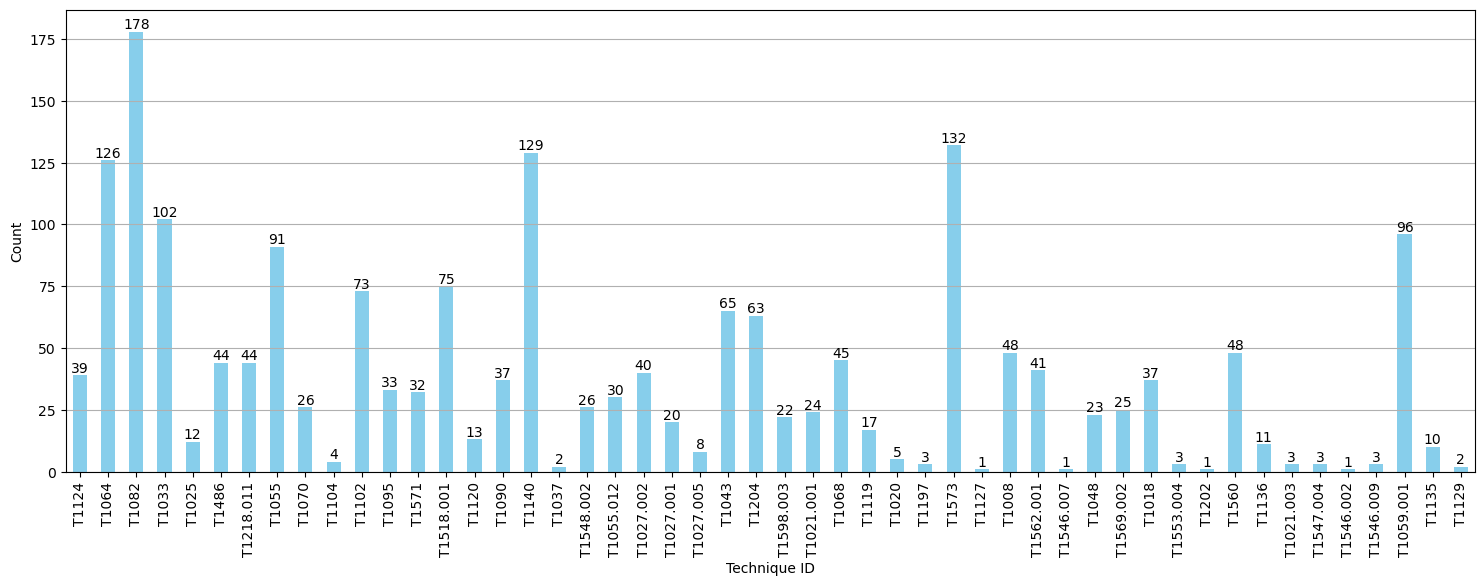

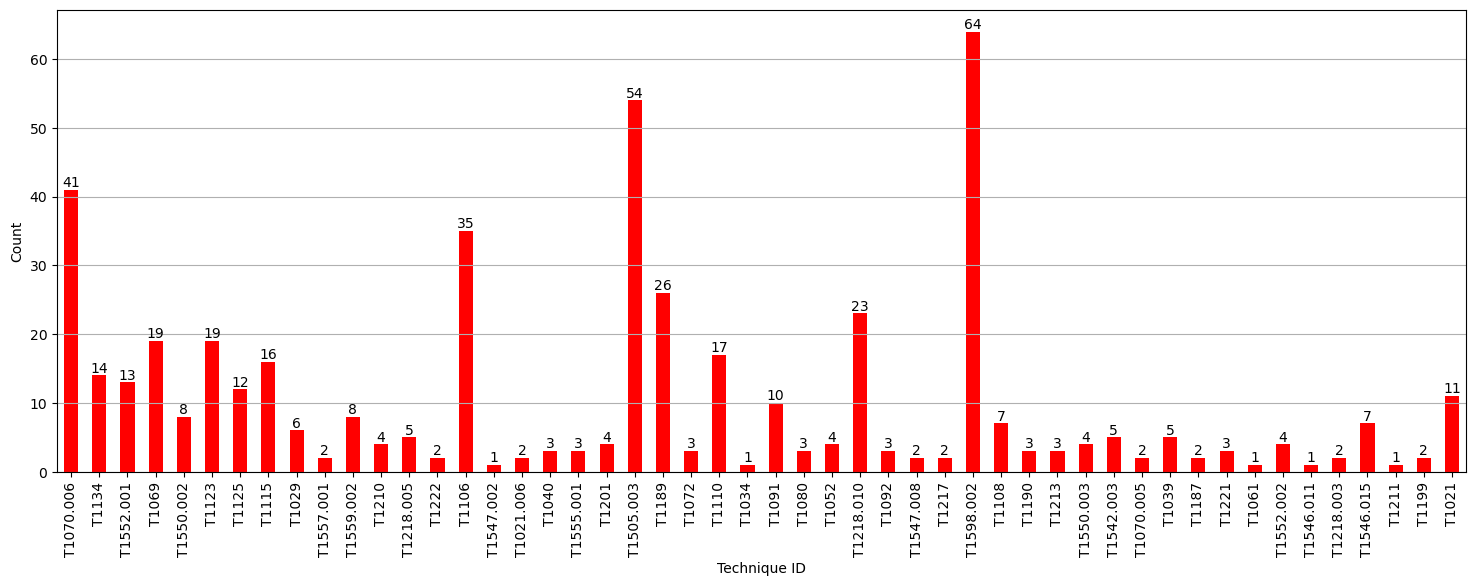

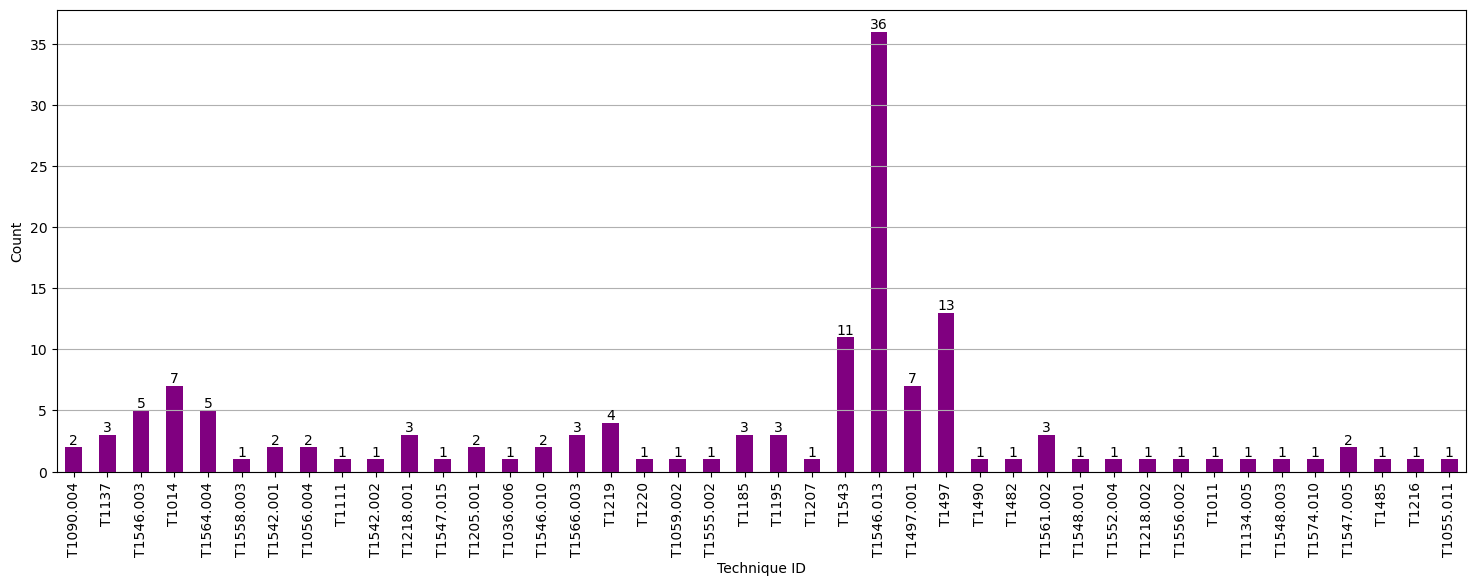

In [49]:
original_sums=full_data.sum(numeric_only=True)
plot_classes_sums(original_sums[:50])
plot_classes_sums(original_sums[50:100],color='skyblue')
plot_classes_sums(original_sums[100:150],color='red')
plot_classes_sums(original_sums[150:-1],color='purple')

In [51]:
additional_data=pd.read_csv('dataset.txt')

In [53]:
additional_data=additional_data.drop(columns=['tec_name','Unnamed: 0','label_tec'])
filtered_data = additional_data[additional_data.label_subtec.isin(cleaned_list)]

In [55]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data['labels']=filtered_data["label_subtec"]
filtered_data['text']=filtered_data['sentence']
filtered_data=filtered_data.drop(columns=['label_subtec','sentence'])

In [57]:
ohe_matrix2 = np.zeros((len(filtered_data),len(cleaned_list)))
filtered_data[cleaned_list]=ohe_matrix2
def one_hot_encoder2(data):
    for i in  range(1,len(data)) :
        data.loc[i,data.loc[i].labels]=1
one_hot_encoder2(filtered_data)
filtered_data[cleaned_list]=filtered_data[cleaned_list].astype(int)


C:\Users\user\AppData\Local\Temp\ipykernel_9300\2735481859.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[cleaned_list]=ohe_matrix2
C:\Users\user\AppData\Local\Temp\ipykernel_9300\2735481859.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[cleaned_list]=ohe_matrix2
C:\Users\user\AppData\Local\Temp\ipykernel_9300\2735481859.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [61]:
filtered_data.loc[0,"T1134"]

0

In [63]:
sum(filtered_data.T1005.tolist())

111

In [65]:
ds = pd.concat([full_data, filtered_data], axis=0, ignore_index=True)


In [67]:
ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## choosing classes to keep and classes to augment

In [70]:
class_counts=ds["labels"].value_counts()
classes_to_keep = class_counts[class_counts >=2].index

In [72]:
filtered_ds = ds[ds['labels'].isin(classes_to_keep)]

In [74]:
filtered_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
unduplicated_classes = class_counts[class_counts >= 15].index

In [78]:
multilabel_unique_classes = class_counts[class_counts < 15].index

In [80]:
multilabel_unique_classes_ds=filtered_ds[filtered_ds['labels'].isin(multilabel_unique_classes)]

In [82]:
filtered_ds=filtered_ds[filtered_ds['labels'].isin(unduplicated_classes)]

In [84]:
multilabel_unique_classes_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"At installation, the MSI file drops three file...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,"""beacon"" payload can receive C2 from one proto...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,A backdoor used by created a Tor hidden servi...,[T1090.003],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,accessed email accounts using Outlook Web Access.,[T1114],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,KeyBoy issues the command reg add “HKLM\SOFTWA...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12491,Bazar can use Winlogon Helper DLL to establish...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12492,Turla established persistence by adding a Shel...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12493,Tropic Trooper has created the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
multilabel_unique_classes_ds=multilabel_unique_classes_ds.reset_index(drop=True)

In [88]:
aug = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', action='substitute')
augmented_text=aug.augment(multilabel_unique_classes_ds.text[9])
augmented_dict={"text" : [] , "labels" : []}
num_augmentations = 2
aug = naw.SynonymAug(aug_p=0.2,aug_min=1)

def augment_text(text):
    return aug.augment(text)
    
for i in range(multilabel_unique_classes_ds.shape[0]) : 
    for num in range(num_augmentations):
        augmented_text=aug.augment(multilabel_unique_classes_ds.text[i])
        augmented_dict["text"].append(augmented_text)
        augmented_dict['labels'].append(multilabel_unique_classes_ds.loc[i,"labels"])
new_df=pd.DataFrame(augmented_dict)



In [89]:
new_df.loc[3,'text']

['At installation, the MSI file drops three files and creates one hidden directory (UFile) into Ampere second: \\ ProgramData \\ Malus pumila \\ Update \\, in all probability as a ruse']

In [90]:
multilabel_unique_classes_ds.loc[1,'text']

'At installation, the MSI file drops three files and creates one hidden directory (UFile) into C:\\ProgramData\\Apple\\Update\\, likely as a ruse'

In [91]:
ohe_matrix_low = np.zeros((len(new_df),len(cleaned_list)))
new_df[cleaned_list]=ohe_matrix_low

one_hot_encoder2(new_df)
one_hot_encoder(new_df)





C:\Users\user\AppData\Local\Temp\ipykernel_9300\2084848324.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[cleaned_list]=ohe_matrix_low
C:\Users\user\AppData\Local\Temp\ipykernel_9300\2084848324.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[cleaned_list]=ohe_matrix_low
C:\Users\user\AppData\Local\Temp\ipykernel_9300\2084848324.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [92]:
new_df=new_df.drop(columns=["T","1","2","0","3","4","5","6","7","8","9","."])
new_df[cleaned_list]=new_df[cleaned_list].astype(int)

In [93]:
for i in range(new_df.shape[0]):
    labels=new_df.loc[i,"labels"]
    new_df.loc[i,labels]=1

    
        

In [94]:

new_df[cleaned_list]=new_df[cleaned_list].astype(int)



In [95]:
new_df

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,[capture window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[capture window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[At installation, the MSI file drop trio india...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[At installation, the MSI file drops three fil...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"["" beacon "" lading can receive C2 from one pro...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,[Turla established tenacity by add a Shell eco...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,[Tropic Trooper has create the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,[Tropic Trooper have created the Register key ...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2574,[Wizard Spider has found persistence using Use...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
for i in range(filtered_data.shape[0]):
    if len(filtered_data.loc[i,'text'])==1:
        filtered_data.loc[i,'text']=filtered_data.loc[i,"text"][0]

In [100]:
filtered_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,can download and execute a second-stage payload.,[T1105],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# model training

In [102]:
y=filtered_ds[cleaned_list]


In [103]:
from sklearn.model_selection import train_test_split
import numpy as np
y=filtered_ds[cleaned_list]
X=filtered_ds["text"]
# Convert y to a NumPy array if it's a DataFrame
y_array = y.values

# Get class indices from one-hot encoded labels
y_class_indices = np.argmax(y_array, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_array,
    test_size=0.2, 
    stratify=y_class_indices,  # stratify based on class indices
    random_state=42 
)

y_train = pd.DataFrame(y_train, columns=y.columns)
y_test = pd.DataFrame(y_test, columns=y.columns)

# Optional: Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8732,)
X_test shape: (2183,)
y_train shape: (8732, 193)
y_test shape: (2183, 193)


In [106]:
y_class_indices

array([  0,   2,   3, ..., 167, 167, 167], dtype=int64)

In [115]:
new_df

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,[capture window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[capture window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[At installation, the MSI file drop trio india...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[At installation, the MSI file drops three fil...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"["" beacon "" lading can receive C2 from one pro...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,[Turla established tenacity by add a Shell eco...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,[Tropic Trooper has create the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,[Tropic Trooper have created the Register key ...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2574,[Wizard Spider has found persistence using Use...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X_test=pd.concat([X_test,multilabel_unique_classes_ds.text],ignore_index=True)
y_test=pd.concat([y_test,multilabel_unique_classes_ds[UniqueLabels]],ignore_index=True)
X_train=pd.concat([X_train,new_df.text],ignore_index=True)
y_train=pd.concat([y_train,new_df[UniqueLabels]],ignore_index=True)

In [119]:
filtered_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,can download and execute a second-stage payload.,[T1105],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
multilabel_unique_classes_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"At installation, the MSI file drops three file...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"""beacon"" payload can receive C2 from one proto...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A backdoor used by created a Tor hidden servi...,[T1090.003],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,accessed email accounts using Outlook Web Access.,[T1114],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,KeyBoy issues the command reg add “HKLM\SOFTWA...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,Bazar can use Winlogon Helper DLL to establish...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,Turla established persistence by adding a Shel...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,Tropic Trooper has created the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
y_train

,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,T1204.002,T1071.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
for i in range(len(X_train)):
    if len(X_train.loc[i])==1:
        X_train.loc[i]=X_train.loc[i][0]

In [127]:
y2=y_train.to_numpy()
y3=y_test.to_numpy()

In [129]:
# model loading 
path="results/checkpoint-25000"
from transformers import AutoConfig, AutoModelForSequenceClassification , RobertaTokenizer



config = AutoConfig.from_pretrained(path)

model = AutoModelForSequenceClassification.from_pretrained(path, config=config)
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [118]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the RoBERTa tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load the RoBERTa model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', 
    num_labels=y2.shape[1], 
    problem_type="multi_label_classification"
)



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [131]:
train_encodings = tokenizer(X_train.to_list(),return_tensors='pt',padding=True,truncation=True)
test_encodings = tokenizer(X_test.to_list(),return_tensors='pt',padding=True,truncation=True)

In [133]:
import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, y2)
test_dataset = TextDataset(test_encodings, y3)

In [118]:
# train the model
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    output_dir='./results',
    num_train_epochs=11,
    logging_dir='./logs',
    evaluation_strategy="epoch", 
    
    
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


trainer.train()


C:\ProgramData\anaconda3\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.019500,0.017768
2,0.010300,0.010291
3,0.006400,0.007190
4,0.003500,0.005447
5,0.001800,0.005360
6,0.001200,0.005253
7,0.000700,0.005393
8,0.000400,0.005324
9,0.000200,0.005238
10,0.000100,0.005417


C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.en

TrainOutput(global_step=30569, training_loss=0.005626074408290904, metrics={'train_runtime': 6771.2816, 'train_samples_per_second': 18.058, 'train_steps_per_second': 4.515, 'total_flos': 1.6252756071788544e+16, 'train_loss': 0.005626074408290904, 'epoch': 11.0})

In [149]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [139]:
train_eval = list(X_train)
test_eval=te = list(X_test)
train_inputs = tokenizer(train_eval, padding=True, truncation=True, return_tensors="pt")
test_inputs= tokenizer(test_eval, padding=True, truncation=True, return_tensors="pt")
train_inputs = {key: value.to(device) for key, value in train_inputs.items()}
test_inputs = {key: value.to(device) for key, value in test_inputs.items()}


In [290]:
import torch

threshold = 0.5  # Adjust this value based on your needs

model.eval()

model.to(device)

batch_size = 16  # Adjust batch size as needed
num_batches = len(train_inputs['input_ids']) // batch_size + 1

train_predictions = []

# Perform inference in batches
with torch.no_grad():
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(train_inputs['input_ids']))
        
        # Extract batch inputs and move to device
        batch_input_ids = train_inputs['input_ids'][start_idx:end_idx].to(device)
        batch_attention_mask = train_inputs['attention_mask'][start_idx:end_idx].to(device)
        
        # Perform inference
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        
        # Convert logits to NumPy array and apply threshold
        logits_np = logits.cpu().numpy()
        batch_predictions = (logits_np > threshold).astype(int)
        
        # Store batch predictions
        train_predictions.append(batch_predictions)

# Concatenate all batch predictions
train_predictions = np.concatenate(train_predictions, axis=0)

print("Predictions shape:", train_predictions.shape)


Predictions shape: (11308, 193)


In [148]:
train_predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [292]:
from sklearn.metrics import f1_score
f1 = f1_score(y2, train_predictions, average='micro')  
print(f'F1 Score on train set: {f1}')

F1 Score on train set: 0.9595963951532922


In [294]:
test_predictions = []
batch_size = 16  
num_batches = len(test_inputs['input_ids']) // batch_size + 1

with torch.no_grad():
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(test_inputs['input_ids']))
        
        # Extract batch inputs and move to device
        batch_input_ids = test_inputs['input_ids'][start_idx:end_idx].to(device)
        batch_attention_mask = test_inputs['attention_mask'][start_idx:end_idx].to(device)
        
        # Perform inference
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        
        # Convert logits to NumPy array and apply threshold
        logits_np = logits.cpu().numpy()
        batch_predictions = (logits_np > threshold).astype(int)
        
        # Store batch predictions
        test_predictions.append(batch_predictions)

test_predictions = np.concatenate(test_predictions, axis=0)

print("Predictions shape:", test_predictions.shape)

Predictions shape: (3471, 193)


In [296]:
f1 = f1_score(y3, test_predictions, average='micro')  
print(f'F1 Score: {f1}')

F1 Score: 0.9577890829093909


In [298]:
def view_true_vs_predicted_labels(X, y, predictions, i, cleaned_list=cleaned_list):
    pred_labels = [cleaned_list[j] for j in range(predictions[i].shape[0]) if predictions[i, j] == 1]
    true_labels = [cleaned_list[j] for j in range(y[i].shape[0]) if y[i, j] == 1]
    print(f'Instance: {X[i]}')
    print(f'Predicted Labels: {pred_labels}')
    print(f'True Labels: {true_labels}')
    


In [300]:
view_true_vs_predicted_labels(X_test,y3,test_predictions,1529)

Instance: attempts to access the ADMIN$, C$\Windows, D$\Windows, and E$\Windows shares on the victim with its current privileges.
Predicted Labels: ['T1083']
True Labels: ['T1083']


In [302]:
ds[ds.text==X_test[1529]]

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
147,"attempts to access the ADMIN$, C$\Windows, D$\...",[T1083],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data visualization

In [304]:
whole_ds=pd.concat([filtered_ds,new_df],axis=0 ,ignore_index=True)

In [306]:
whole_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,can download and execute a second-stage payload.,[T1105],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,[Turla established persistence by add together...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13487,[Tropic Cavalryman has create the Register key...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13488,[Tropic Trooper own created the Registry cardi...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13489,[Wizard Spider birth install pertinacity using...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
col_sum=whole_ds.sum(numeric_only=True)

In [310]:
col_sum[:30]

T1005        152
T1010         59
T1027        532
T1059        272
T1074         63
T1105        547
T1112        158
T1564.001     70
T1204.002    121
T1071.001    262
T1041        111
T1071        227
T1132         67
T1056.001    123
T1056         88
T1203        114
T1053.005    199
T1053         41
T1057        320
T1026          6
T1113        205
T1070.004    334
T1553.002     90
T1574.002     91
T1047        133
T1090.003     38
T1055.013     20
T1574.001     62
T1114         38
T1021.002     62
dtype: int64

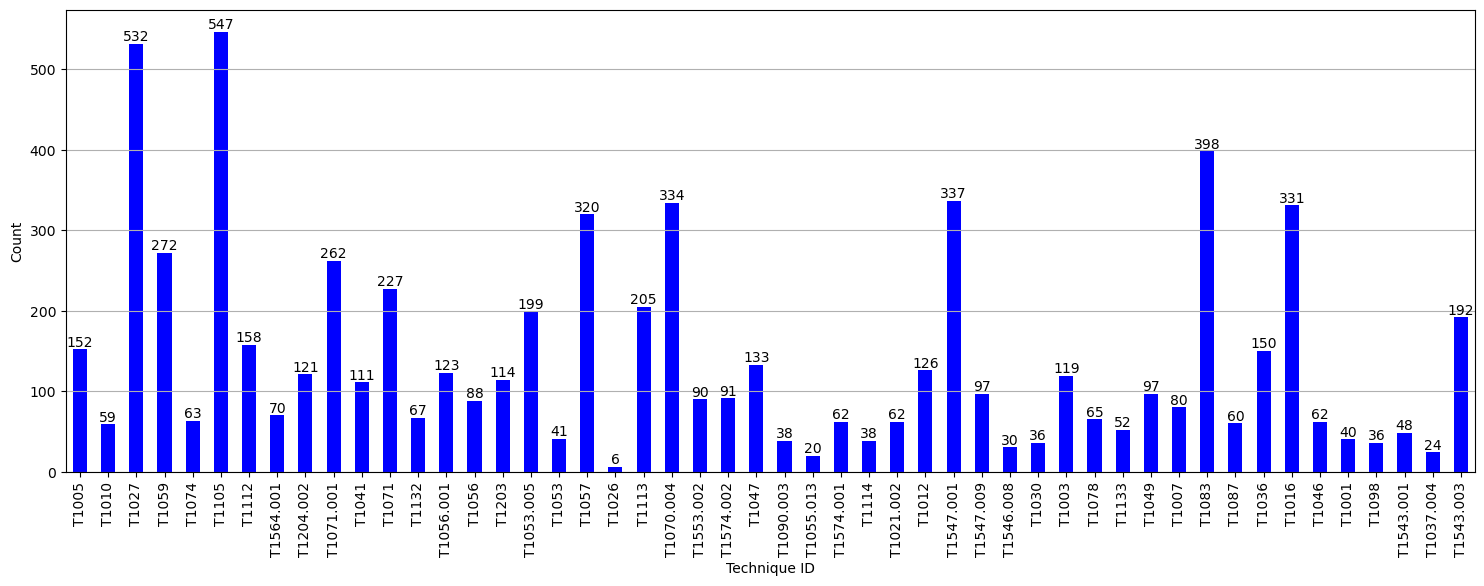

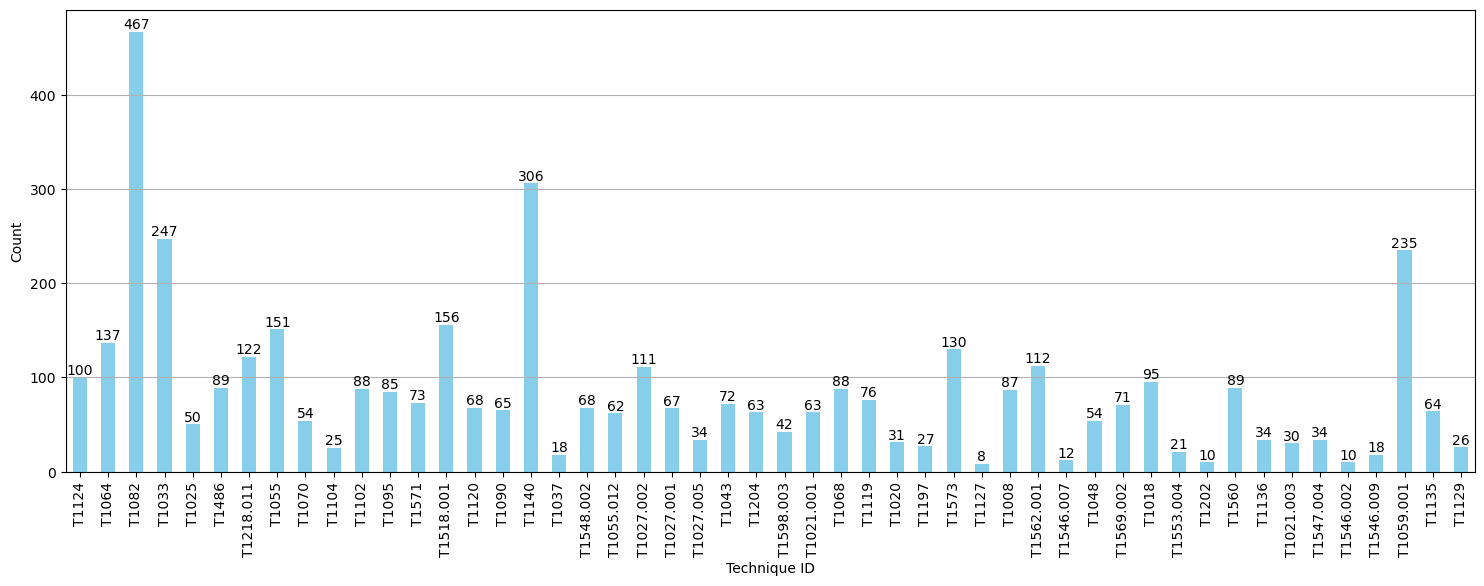

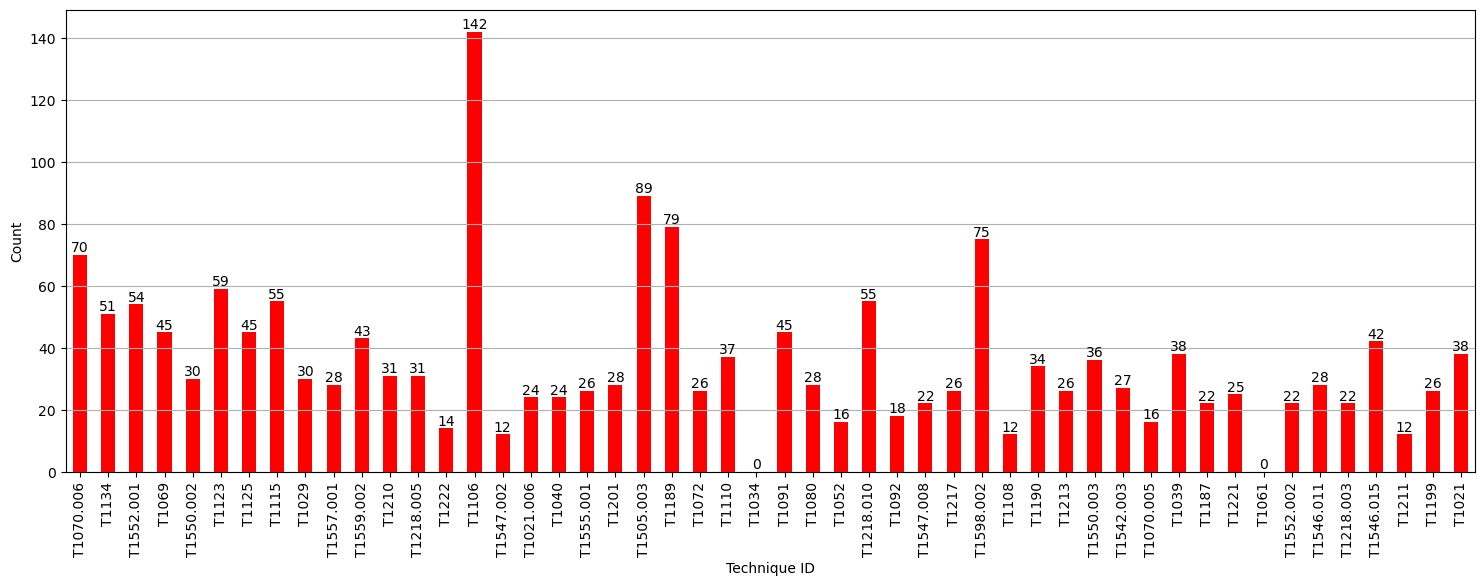

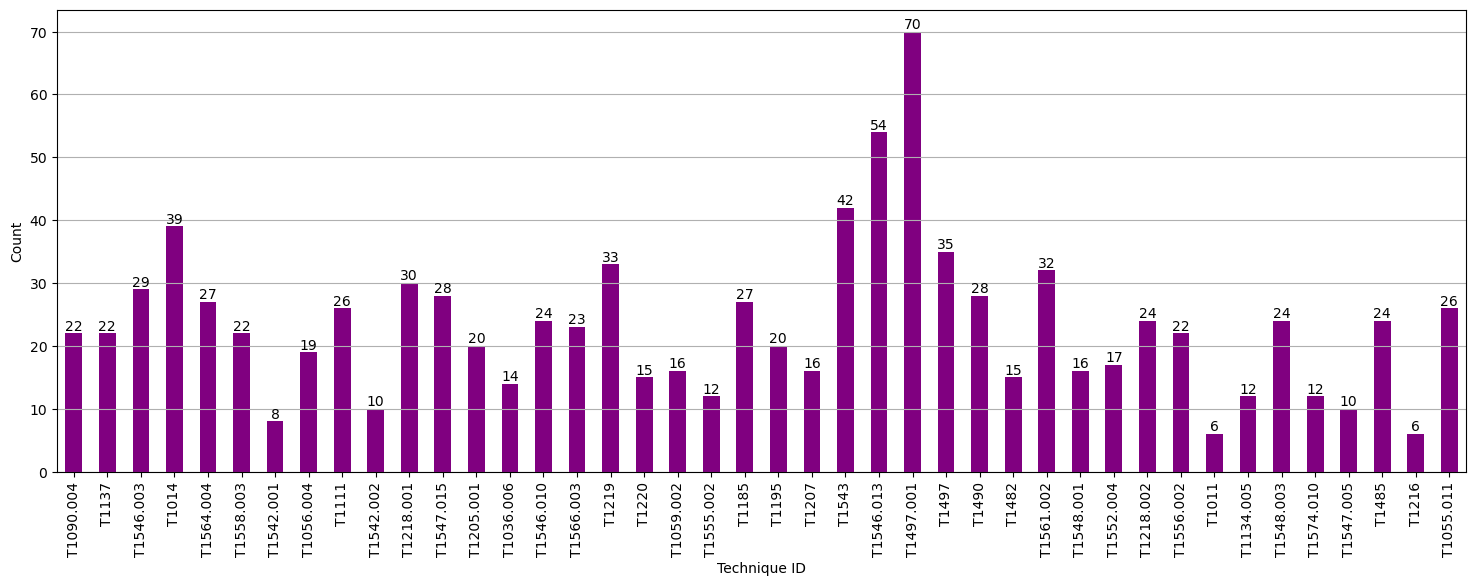

In [312]:
plot_classes_sums(col_sum[:50])
plot_classes_sums(col_sum[50:100],color='skyblue')
plot_classes_sums(col_sum[100:150],color='red')
plot_classes_sums(col_sum[150:-1],color='purple')

In [166]:
bert_stats={"train_loss":[0.0254,0.0158,0.0111,0.0087,0.0064,0.005,0.0047,0.0034],"val_loss":[0.027,0.0164,0.0119,0.0103,0.0094,0.0088,0.0085,0.0082],
           "f_1":[0.94,0.79]}
roberta_stats={"train_loss":[0.0311,0.0314,0.0309],"val_loss":[0.0298,0.0298,0.0297]}
dbert_old={"train_loss":[0.0186,0.01170,0.007,0.0046,0.0034,0.0023],"val_loss":[0.0156,0.0102,0.0084,0.007590,0.0071,0.0070],
"f_1":[0,96,0.82]}
dbert_new={"train_loss":[0.0195,0.0103,0.0064,0.0035,0.0018,0.0012,0.0007,0.0004,0.0002,0.0001,0.0001],
           "val_loss":[0.0177,0.0102,0.0071,0.0054,0.0053,0.0052,0.0053,0.0053,0.0052,0.0054,0.0055]}

Text(0.5, 0, 'Epochs')

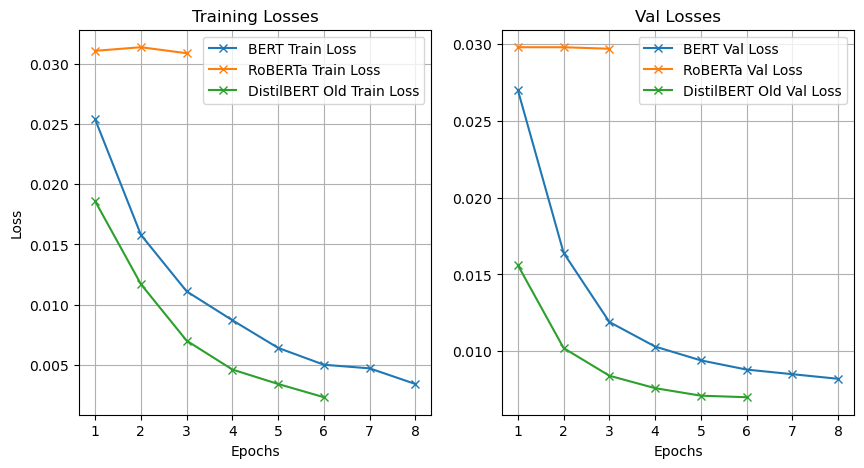

In [168]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Losses
epochs_bert = range(1, len(bert_stats["train_loss"]) + 1)
epochs_roberta = range(1, len(roberta_stats["train_loss"]) + 1)
epochs_dbert_old = range(1, len(dbert_old["train_loss"]) + 1)

ax[0].plot(epochs_bert, bert_stats["train_loss"], label='BERT Train Loss', marker='x')
ax[1].plot(epochs_bert, bert_stats["val_loss"], label='BERT Val Loss', marker='x')
ax[0].plot(epochs_roberta, roberta_stats["train_loss"], label='RoBERTa Train Loss', marker='x')
ax[1].plot(epochs_roberta, roberta_stats["val_loss"], label='RoBERTa Val Loss', marker='x')
ax[0].plot(epochs_dbert_old, dbert_old["train_loss"], label='DistilBERT Old Train Loss', marker='x')
ax[1].plot(epochs_dbert_old, dbert_old["val_loss"], label='DistilBERT Old Val Loss', marker='x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Losses')
ax[0].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_title('Val Losses')
ax[1].legend()
ax[1].set_xlabel('Epochs')



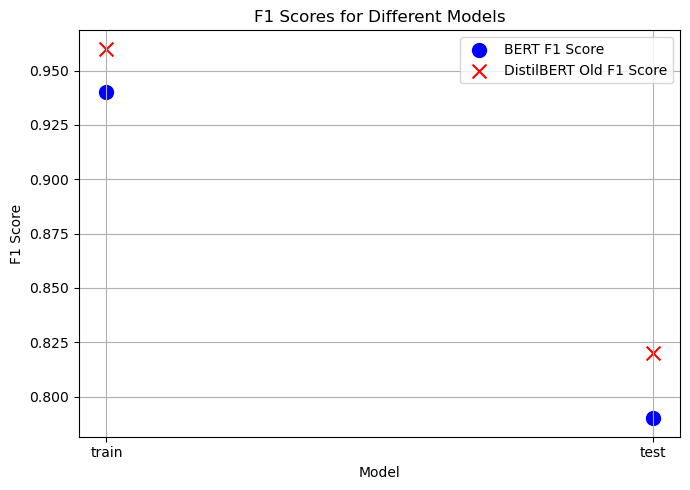

In [170]:
import matplotlib.pyplot as plt

# Data
models = ['train', 'test']
bert_f1 = [0.94, 0.79]
dbert_old_f1 = [0.96, 0.82]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))


ax.scatter(models, bert_f1, color='blue', label='BERT F1 Score', s=100, marker='o')
ax.scatter(models, dbert_old_f1, color='red', label='DistilBERT Old F1 Score', s=100, marker='x')
# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Models')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Epochs')

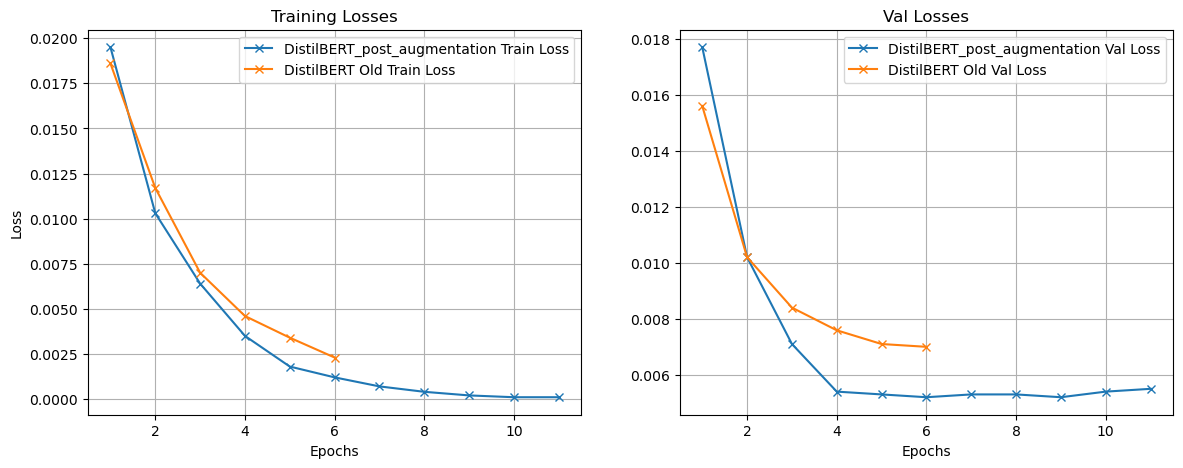

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))


epochs_dbert_new = range(1, len(dbert_new["train_loss"]) + 1)
epochs_dbert_old = range(1, len(dbert_old["train_loss"]) + 1)

ax[0].plot(epochs_dbert_new, dbert_new["train_loss"], label='DistilBERT_post_augmentation Train Loss', marker='x')
ax[1].plot(epochs_dbert_new, dbert_new["val_loss"], label='DistilBERT_post_augmentation Val Loss', marker='x')
ax[0].plot(epochs_dbert_old, dbert_old["train_loss"], label='DistilBERT Old Train Loss', marker='x')
ax[1].plot(epochs_dbert_old, dbert_old["val_loss"], label='DistilBERT Old Val Loss', marker='x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Losses')
ax[0].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_title('Val Losses')
ax[1].legend()
ax[1].set_xlabel('Epochs')


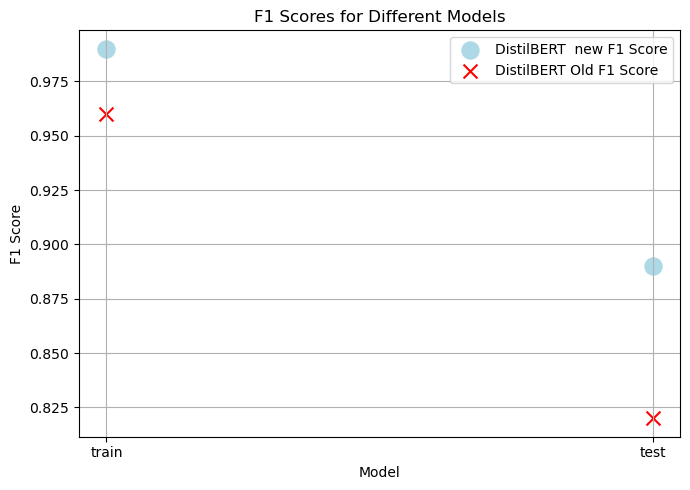

In [176]:
# Data
models = ['train', 'test']
dbert_new_f1 = [0.99, 0.89]
dbert_old_f1 = [0.96, 0.82]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))


ax.scatter(models, dbert_new_f1, color='lightblue', label='DistilBERT  new F1 Score', s=150, marker='o')
ax.scatter(models, dbert_old_f1, color='red', label='DistilBERT Old F1 Score', s=100, marker='x')
# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Models')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()